In [276]:
from skimage.metrics import structural_similarity as ssim
import cv2
import pytesseract
import requests
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from difflib import SequenceMatcher

In [40]:
API_KEY = 'K88030080888957'

In [26]:
answer_path = r"D:\input.png"
student_path = r"D:\student.jpg"

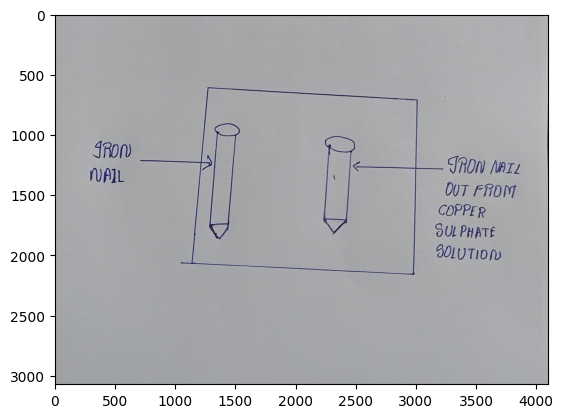

In [164]:
image = cv2.imread(student_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image)

In [146]:
import cv2
import numpy as np

def preprocess_image(image_path, size=(500, 500)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, size)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    binary = cv2.adaptiveThreshold(
        blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, 13, 7
    )
    return gray, binary


In [148]:
answer_gray, answer_binary = preprocess_image(answer_path)
student_gray, student_binary = preprocess_image(student_path)

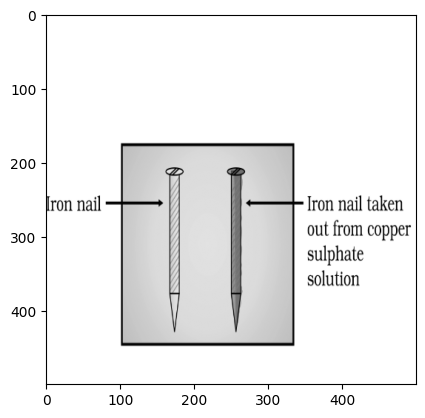

In [150]:

plt.imshow(answer_gray, cmap='gray')

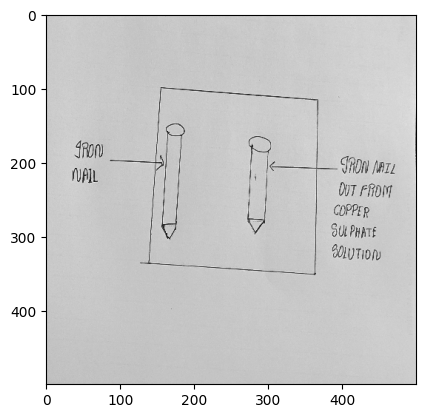

In [158]:
plt.imshow(student_gray, cmap='gray')

In [198]:
cv2.imwrite("student_temp.png", student_gray)

True

In [152]:
ssim_score, _ = ssim(answer_gray, student_gray, full=True)

In [104]:
ssim_score

0.7056571212656061

In [266]:
def extract_text_from_image(image_path):
    with open(image_path, 'rb') as img_file:
        response = requests.post(
            'https://api.ocr.space/parse/image',
            files={'file': img_file},
            data={
                'apikey': API_KEY,
                'language': 'eng',
                'isTable': True,
                'scale': True,
                'OCREngine': 2
            }
        )
    result = response.json()
    text_lines = []
    try:
        text = result['ParsedResults'][0]['ParsedText']
        lines = text.split('\n')
        text_lines = [line.strip().upper() for line in lines if line.strip()]
    except Exception as e:
        print("OCR error:", e)
    return ' '.join(text_lines)

In [268]:
answer_labels = extract_text_from_image(answer_path)
student_labels = extract_text_from_image("student_temp.png")

In [269]:
answer_labels

'IRON NAIL -\t• IRON NAIL TAKEN OUT FROM COPPER SULPHATE SOLUTION'

In [270]:
student_labels

'FRON TRON NAIL MAIL OUT FROM COPPER SUL PHATE SOLUTION'

In [292]:
similarity = SequenceMatcher(None, answer_labels, student_labels).ratio()

In [296]:
similarity

0.7863247863247863

In [298]:
total_mark = (ssim_score + similarity) / 2


In [304]:
total_mark*100

74.59909537951962